#

In [24]:
from subprocess import check_output
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings 
warnings.filterwarnings('ignore')
from math import ceil
#Plots
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas.tools.plotting import parallel_coordinates
#Advanced optimization
from scipy import optimize as op

#Load Data
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


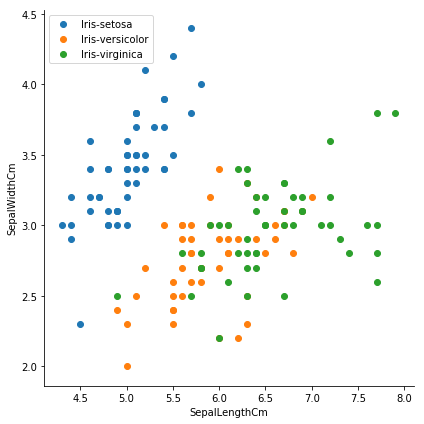

In [16]:
#Visualizations

#Plot with respect to sepal length
sepalPlt = sb.FacetGrid(iris, hue="Species", size=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
plt.legend(loc='upper left');

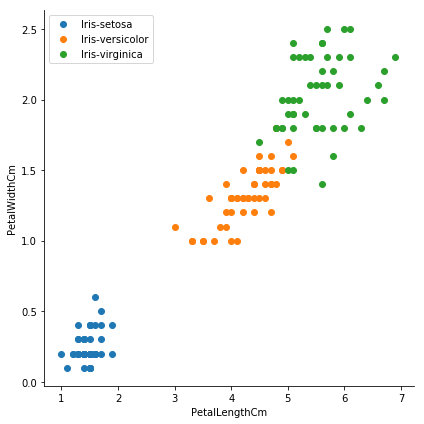

In [17]:
#plot with respect to petal length
petalPlt = sb.FacetGrid(iris, hue="Species", size=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm")
plt.legend(loc='upper left');

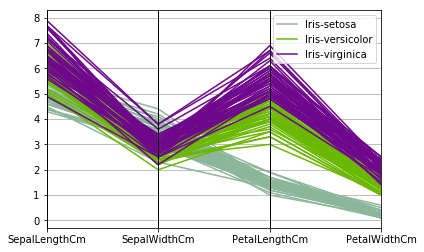

In [18]:
#Sepal and Petal lengths
parallel_coordinates(iris.drop("Id", axis=1), "Species");

In [19]:
#Data setup

Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
#Number of examples
m = iris.shape[0]
#Features
n = 4
#Number of classes
k = 3

X = np.ones((m,n + 1))
y = np.array((m,1))
X[:,1] = iris['PetalLengthCm'].values
X[:,2] = iris['PetalWidthCm'].values
X[:,3] = iris['SepalLengthCm'].values
X[:,4] = iris['SepalWidthCm'].values

#Labels
y = iris['Species'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)
 

**Regularized Cost function and gradient
**
![#Regularized Cost][1]

![#Regularized Gradient][2]


  [1]: http://i.imgur.com/id7nVp6.png
  [2]: http://i.imgur.com/7x8omie.png

In [20]:
#Logistic Regression

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Regularized cost function
def regCostFunction(theta, X, y, _lambda = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    reg = (_lambda/(2 * m)) * np.sum(theta**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

#Regularized gradient function
def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    reg = _lambda * theta /m

    return ((1 / m) * X.T.dot(h - y)) + reg

#Optimal theta 
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x

In [21]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for flower in Species:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == flower, dtype = int)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [22]:
#Predictions
P = sigmoid(X_test.dot(all_theta.T)) #probability for each flower
p = [Species[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

Test Accuracy  96.66666666666667 %


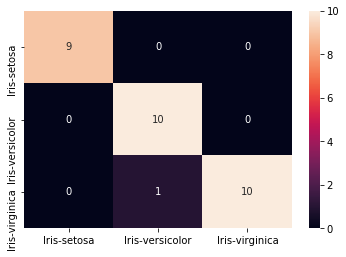

In [23]:
#Confusion Matrix
cfm = confusion_matrix(y_test, p, labels = Species)

sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species);